In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("Train.csv")

In [3]:
test = pd.read_csv("/content/Test (1).csv






-")

In [4]:
train1 = train.copy()

In [5]:
train1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [6]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
train1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
train1.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

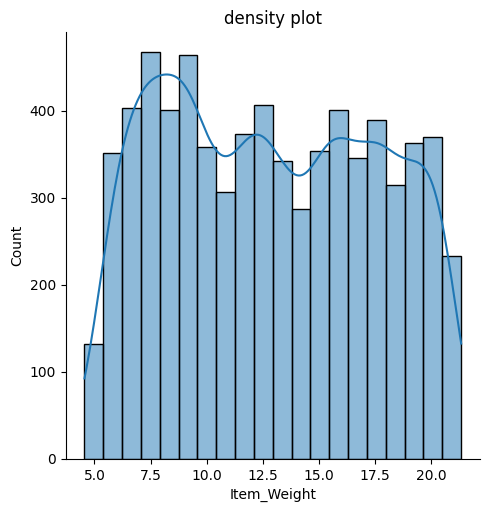

In [9]:
sns.displot(train1["Item_Weight"],kde=True)
plt.title("density plot")
plt.show()

In [10]:
#finding outliers for Item weight and Outlet size(for filling the null values in the both column)

<Axes: xlabel='Item_Weight'>

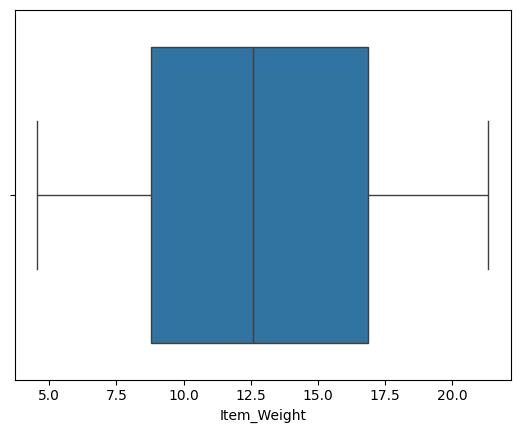

In [11]:
sns.boxplot(x="Item_Weight",data=train1)

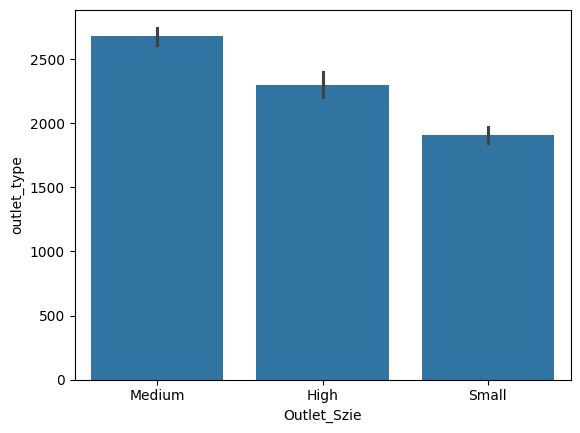

In [12]:
sns.barplot(x="Outlet_Size",y="Item_Outlet_Sales",data=train1)
plt.xlabel("Outlet_Szie")
plt.ylabel("outlet_type")
plt.show()

In [13]:
##as we dont have any outliers neither data is skewed we can use mean for filling the null values for item_weight and use mode for outlet_size we can use mode

In [14]:
train1["Item_Weight"].fillna(train1["Item_Weight"].mean(),inplace=True)

In [15]:
train1["Outlet_Size"].fillna(train1["Outlet_Size"].mode()[0],inplace=True)

In [16]:
train1[["Item_Weight","Outlet_Size"]].isna().sum()

Item_Weight    0
Outlet_Size    0
dtype: int64

In [17]:
#lets check duplicate values if any

In [18]:
train1.duplicated().sum()

0

In [19]:
#as we can see there are no duplicate values in the dataset

In [20]:
train1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [21]:
#now lets findout the correlation between the features

In [22]:
numeric=train1.select_dtypes(include=["float64","int64"]).columns

In [23]:
correlation=(train1[numeric]).corr()

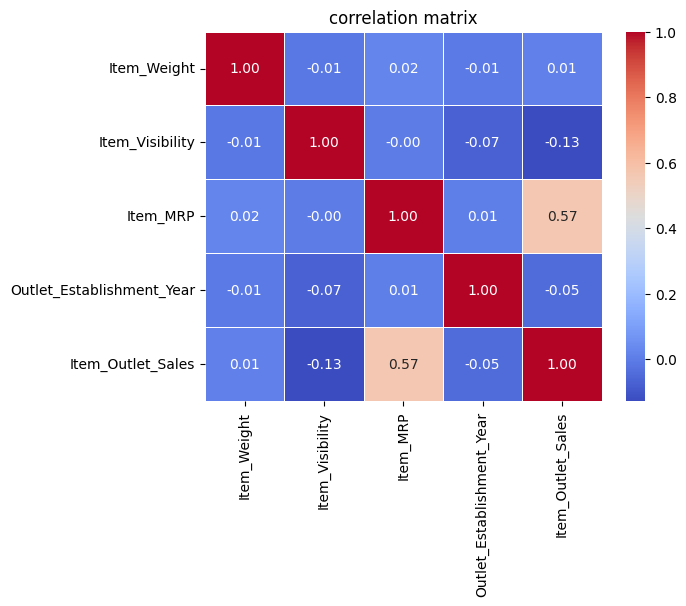

In [24]:
sns.heatmap(correlation,annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.title("correlation matrix")
plt.show()

In [25]:
#as we can see there is no much correlation among the features expect item_mrp with outlet_sales

In [26]:
train1["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [27]:
 #as we have same feature repeated in item fat content we will combine them
 train1["Item_Fat_Content"]=train1["Item_Fat_Content"].replace(["Low Fat","LF"],"low fat")
 train1["Item_Fat_Content"]=train1["Item_Fat_Content"].replace("reg","Regular")

In [28]:
train1.Item_Fat_Content.unique()

array(['low fat', 'Regular'], dtype=object)

In [29]:
#now it will be easy to encode the Item_Fat_Content column as we have only 2 unique features, intially we had "low fat" in different ways, we have replaced them with "low fat" as all other "lowfat" feature were same.

In [30]:
train1.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

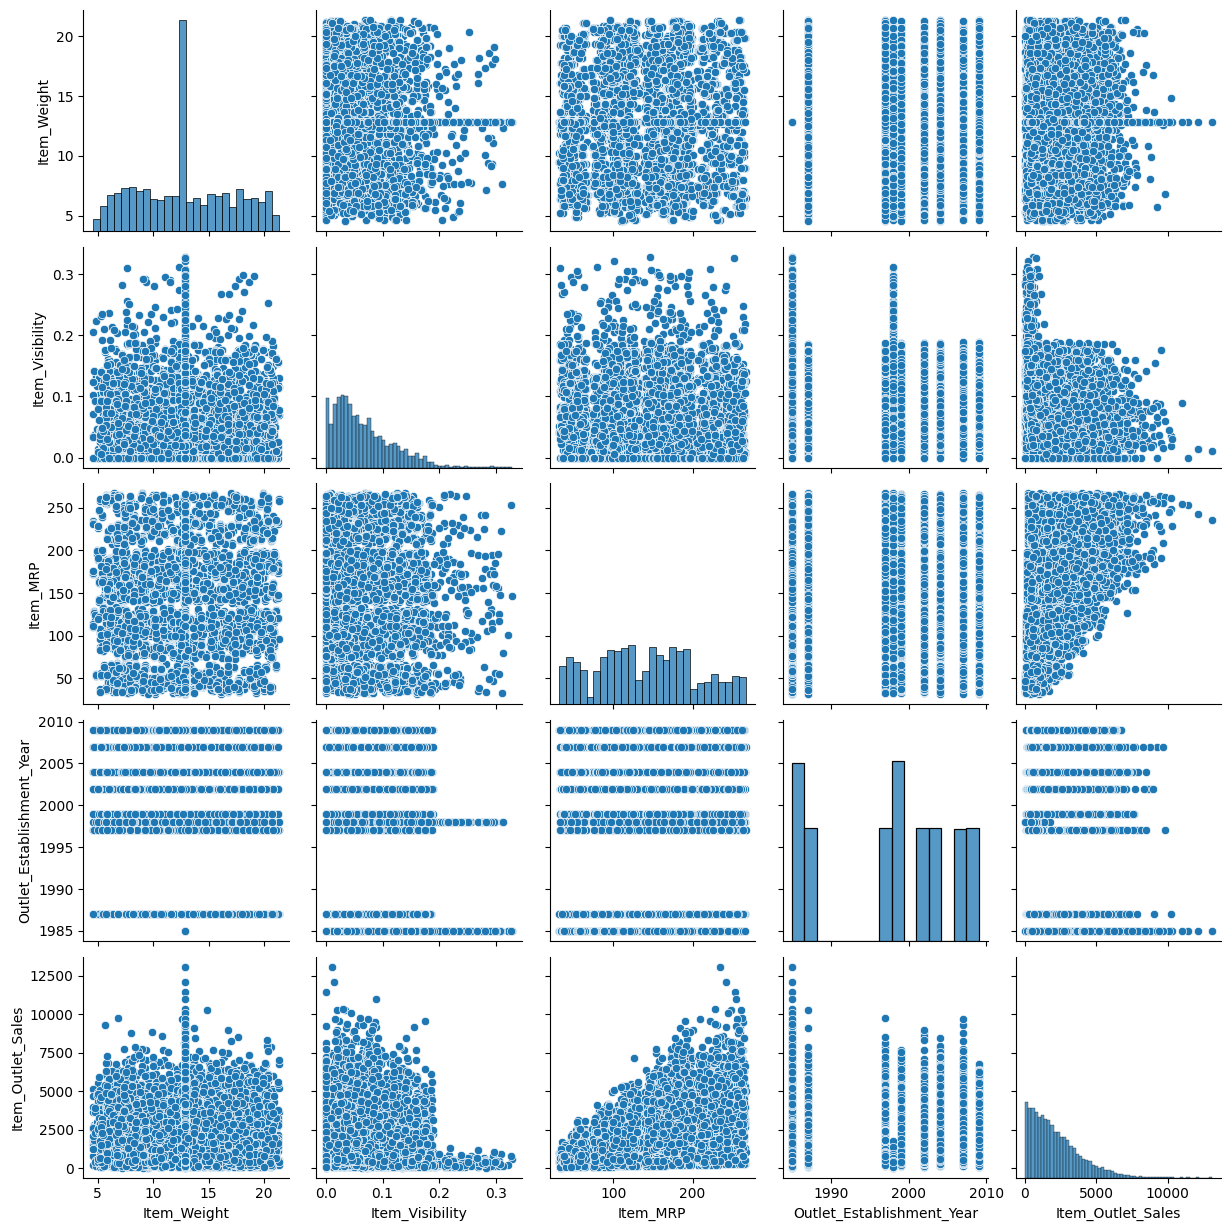

In [31]:
sns.pairplot(train1[numeric])

In [32]:
train1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,low fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,low fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [33]:
#finding out the outliers

In [34]:
numeric_f=["Item_Weight","Item_Visibility","Item_MRP","Item_Outlet_Sales","Outlet_Establishment_Year"]
categorical_f=["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type",]

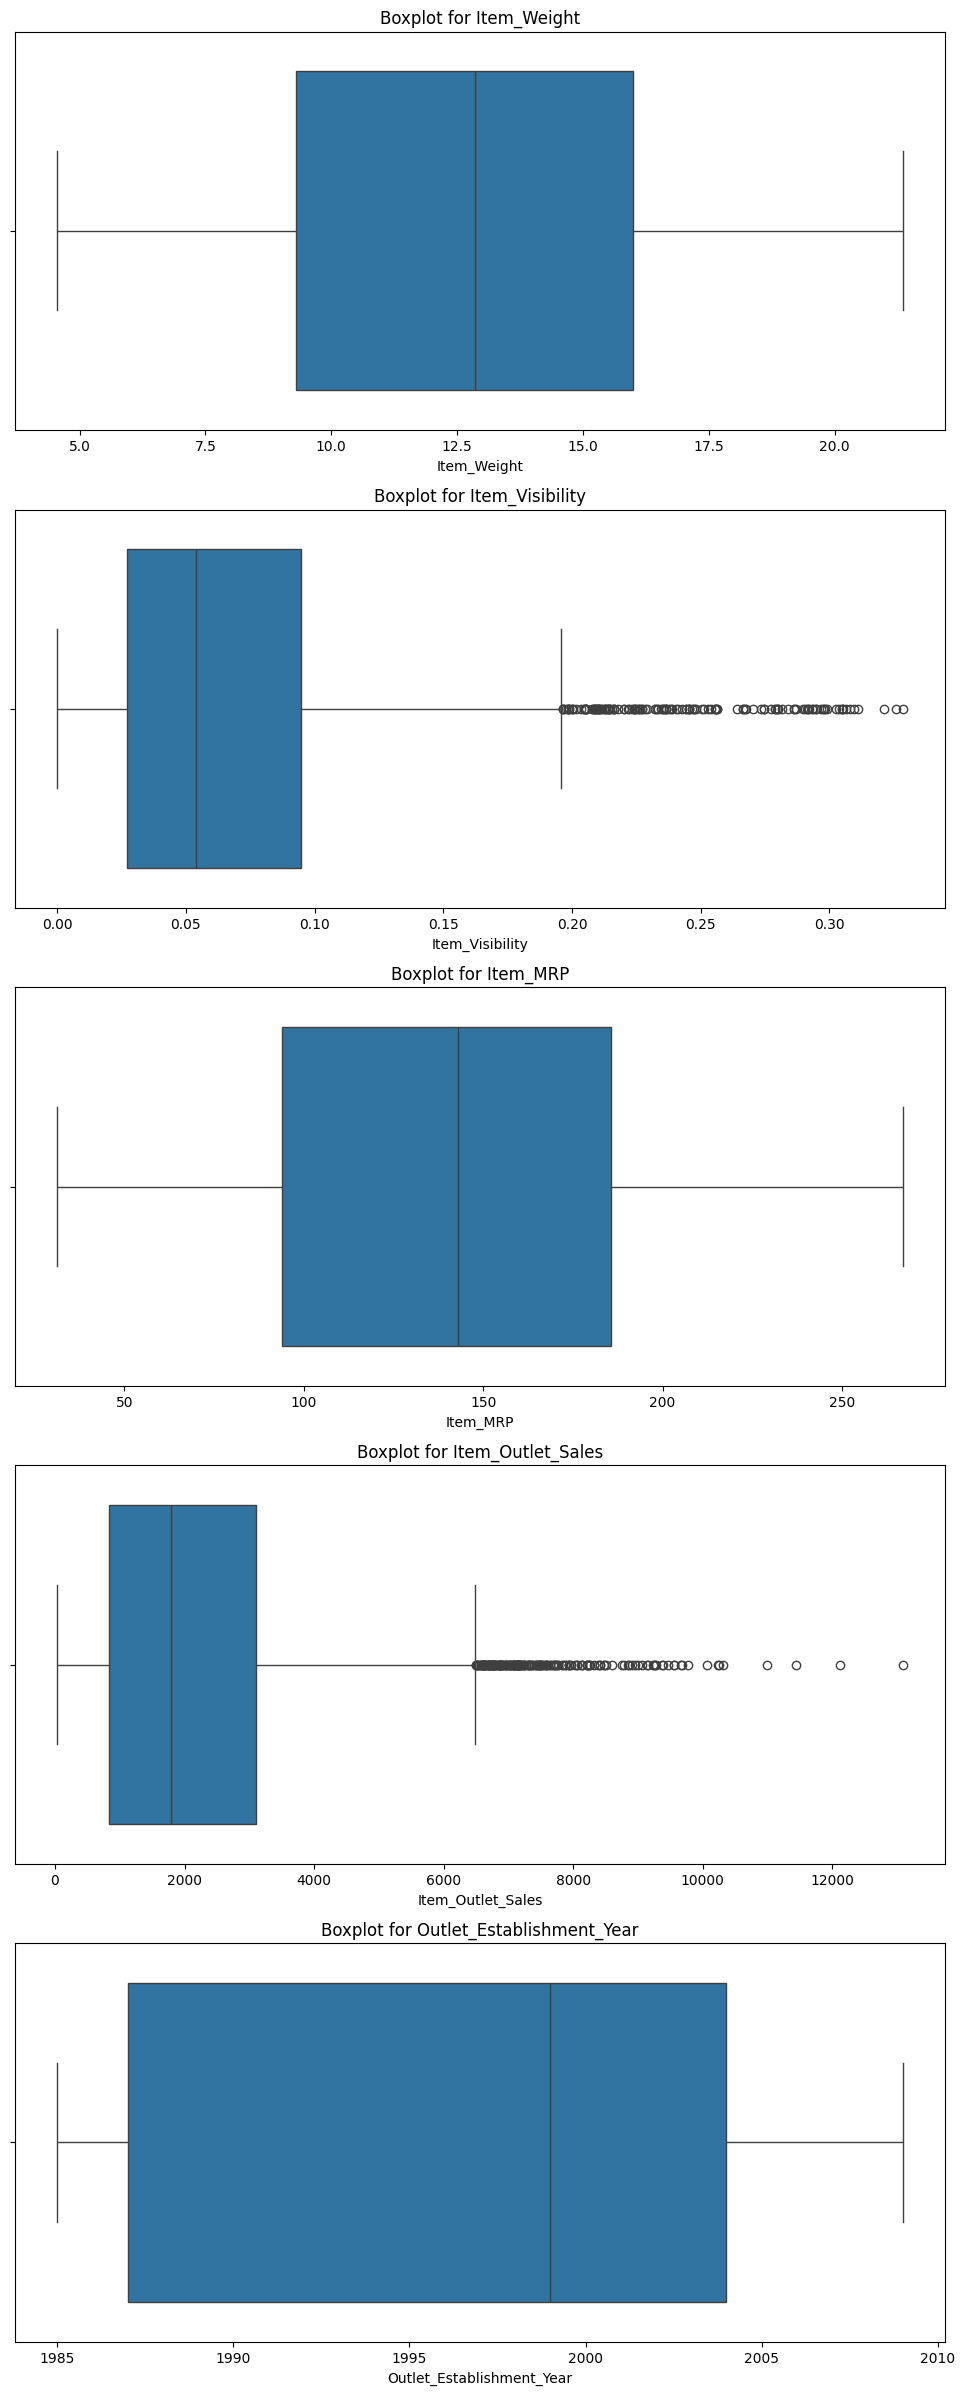

In [35]:
fig, axes = plt.subplots(nrows=len(numeric_f), ncols=1, figsize=(12, 6 * len(numeric_f)))

# Plotting boxplots for numeric columns
for i, column in enumerate(numeric_f):
    sns.boxplot(x=train1[column], ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')


In [36]:
#as we have outliers present in item_visibility and item_outlet_sale we will analysis them using other features

In [37]:
zero_visibility_counts = train1[train1['Item_Visibility'] == 0].groupby('Item_Type').size()
# Displaying the counts
print("Count of Item Types with Visibility Value = 0:")
print(zero_visibility_counts)

Count of Item Types with Visibility Value = 0:
Item_Type
Baking Goods             45
Breads                   17
Breakfast                 3
Canned                   33
Dairy                    38
Frozen Foods             51
Fruits and Vegetables    87
Hard Drinks              17
Health and Hygiene       33
Household                51
Meat                     20
Others                   10
Seafood                   4
Snack Foods              68
Soft Drinks              34
Starchy Foods            15
dtype: int64


In [38]:
train1["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [39]:
#we will round off item visibility value by 2 decimal points

train1["Item_Visibility"]=train1["Item_Visibility"].round(2)

Text(0.5, 0, 'Item Visibility')

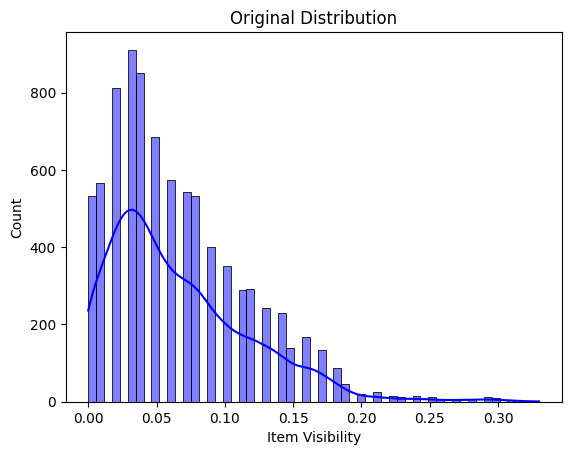

In [40]:
sns.histplot(train1['Item_Visibility'], kde=True, color='blue')
plt.title('Original Distribution')
plt.xlabel('Item Visibility')

In [41]:
#as we can see item_visibility is right skewed, now we will be using log transformation method to handle the outliers

In [42]:
train1["Item_Visibility_Log"]=np.log1p(train1["Item_Visibility"])

<Axes: xlabel='Item_Visibility_Log'>

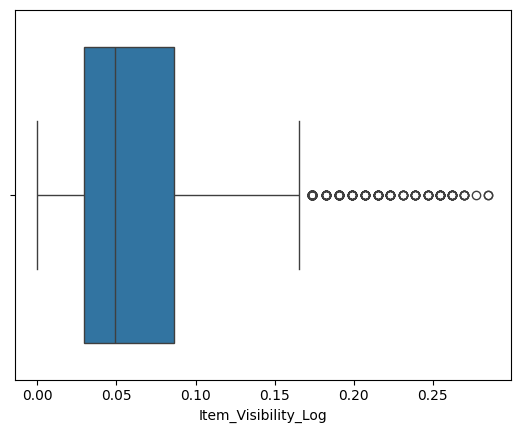

In [43]:
sns.boxplot(x="Item_Visibility_Log",data=train1)

In [44]:
train1["Item_Visibility_Sqrt"]=np.sqrt(train1["Item_Visibility"])

<Axes: xlabel='Item_Visibility_Sqrt'>

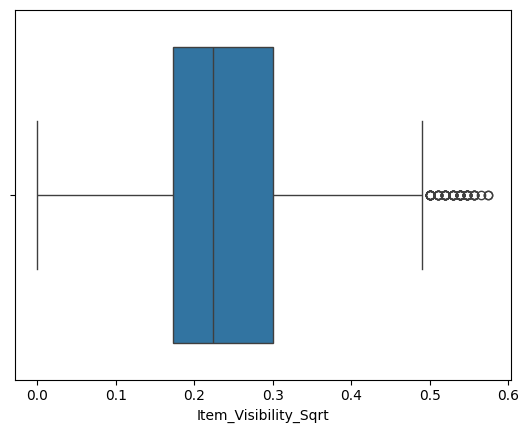

In [45]:
sns.boxplot(x="Item_Visibility_Sqrt",data=train1)

In [46]:
from scipy.stats import boxcox
train1["Item_Visibility_Bcx"],_=boxcox(train1["Item_Visibility"]+1)

<Axes: xlabel='Item_Visibility_Bcx'>

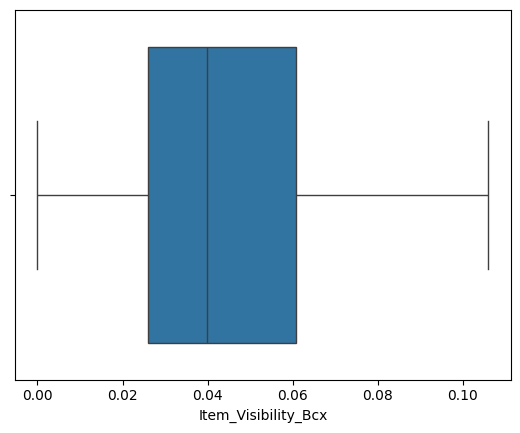

In [47]:
sns.boxplot(x="Item_Visibility_Bcx",data=train1)

In [48]:
#as we have used log and squareroot transformation method both failed to reduce the outliers, so we have used boxcox method by which the outliers are reduced

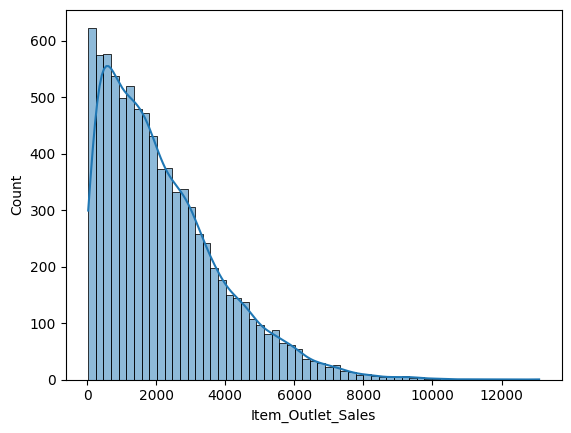

In [49]:
sns.histplot(train1["Item_Outlet_Sales"],kde=True)
plt.show()

In [50]:
#as we can see the skewness in the data, will use different methods to handle outliers for outlet_sales

In [51]:
train1["Item_Outlet_Sales_bcx"],_=boxcox(train1["Item_Outlet_Sales"]+1)

<Axes: xlabel='Item_Outlet_Sales_bcx'>

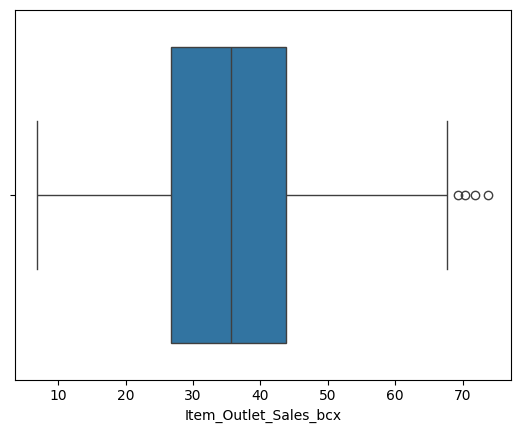

In [52]:
sns.boxplot(x="Item_Outlet_Sales_bcx",data=train1)

In [53]:
from scipy.stats.mstats import winsorize
train1['Item_Outlet_Sales_win'] = winsorize(train1['Item_Outlet_Sales'], limits=[0.05, 0.05])

<Axes: xlabel='Item_Outlet_Sales_win'>

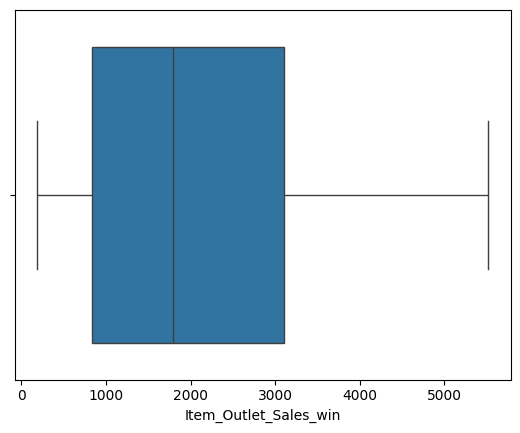

In [54]:
sns.boxplot(x="Item_Outlet_Sales_win",data=train1)

In [55]:
#so by using winsorize we got to reduce the outliers

In [56]:
train1.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Visibility_Log,Item_Visibility_Sqrt,Item_Visibility_Bcx,Item_Outlet_Sales_bcx,Item_Outlet_Sales_win
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066164,140.992782,1997.831867,2181.288914,0.062933,0.233673,0.043463,35.239871,2125.893932
std,4.226124,0.051641,62.275067,8.371760,1706.499616,0.047261,0.107530,0.024985,11.757989,1539.948166
min,4.555000,0.000000,31.290000,1985.000000,33.290000,0.000000,0.000000,0.000000,6.926177,188.421400
25%,9.310000,0.030000,93.826500,1987.000000,834.247400,0.029559,0.173205,0.026088,26.722748,834.247400
50%,12.857645,0.050000,143.012800,1999.000000,1794.331000,0.048790,0.223607,0.039817,35.693263,1794.331000
75%,16.000000,0.090000,185.643700,2004.000000,3101.296400,0.086178,0.300000,0.060786,43.726469,3101.296400
max,21.350000,0.330000,266.888400,2009.000000,13086.964800,0.285179,0.574456,0.105950,73.797658,5522.811000


In [57]:
#now let us drop the above unnecessary columns
train1.drop(columns=["Item_Visibility_Log","Item_Visibility_Sqrt","Item_Outlet_Sales_bcx"],axis=1,inplace=True)

In [58]:
train1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_Bcx,Item_Outlet_Sales_win
0,FDA15,9.300,low fat,0.02,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.018202,3735.1380
1,DRC01,5.920,Regular,0.02,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.018202,443.4228
2,FDN15,17.500,low fat,0.02,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.018202,2097.2700
3,FDX07,19.200,Regular,0.00,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,0.000000,732.3800
4,NCD19,8.930,low fat,0.00,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.000000,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,low fat,0.06,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,0.045789,2778.3834
8519,FDS36,8.380,Regular,0.05,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,0.039817,549.2850
8520,NCJ29,10.600,low fat,0.04,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,0.033270,1193.1136
8521,FDN46,7.210,Regular,0.15,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,0.081171,1845.5976


In [59]:
train1["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [60]:
mapping = {
    "Dairy": "Food","Soft Drinks": "Drinks","Meat": "Food","Fruits and Vegetables": "Food","Household": "NonConsumable","Baking Goods": "NonConsumable","Snack Foods": "Food","Frozen Foods": "Food","Breakfast": "Food",  "Health and Hygiene": "NonConsumable", "Hard Drinks": "Drinks","Canned": "Food","Breads": "Food", "Starchy Foods": "Food","Others": "NonConsumable","Seafood": "Food"
      }

In [61]:
train1["Item_Type"] = train1["Item_Type"].str.strip().map(mapping)

In [62]:
train1["Item_Type"].unique()

array(['Food', 'Drinks', 'NonConsumable'], dtype=object)

In [63]:
 #checking the missing values if any
train1.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Visibility_Bcx          0
Item_Outlet_Sales_win        0
dtype: int64

In [64]:
categorical_f=["Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type","Outlet_Type"]

<ipython-input-65-534da889d36e>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='Item_Outlet_Sales', data=train1, ci=None)
<ipython-input-65-534da889d36e>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='Item_Outlet_Sales', data=train1, ci=None)
<ipython-input-65-534da889d36e>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='Item_Outlet_Sales', data=train1, ci=None)
<ipython-input-65-534da889d36e>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='Item_Outlet_Sales', data=train1, ci=None)
<ipython-input-65-534da889d36e>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='Item_Outlet_Sales', data=train1, ci=None)
<ipython-i

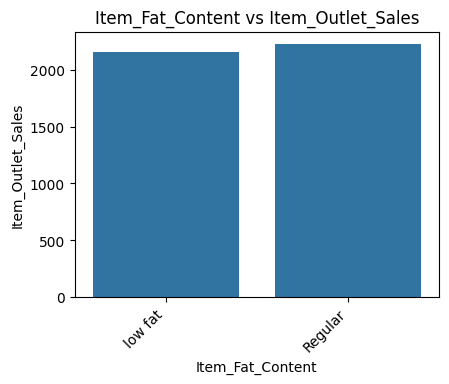

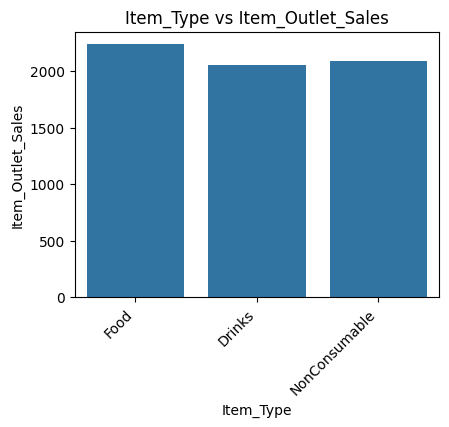

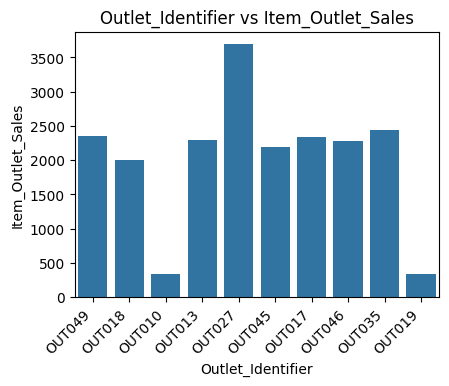

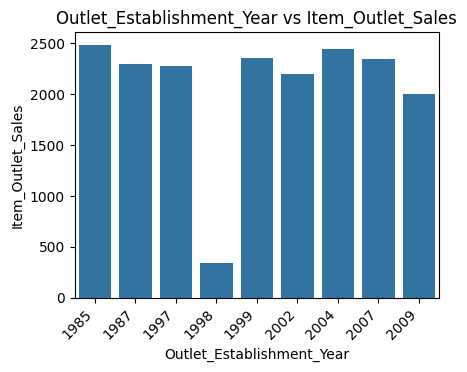

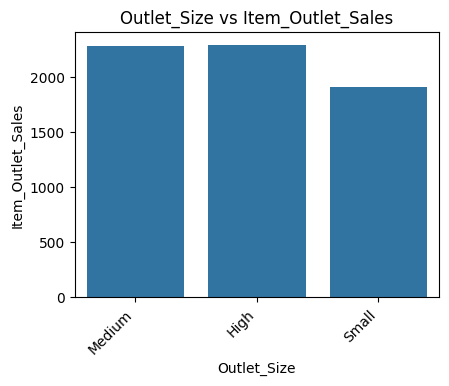

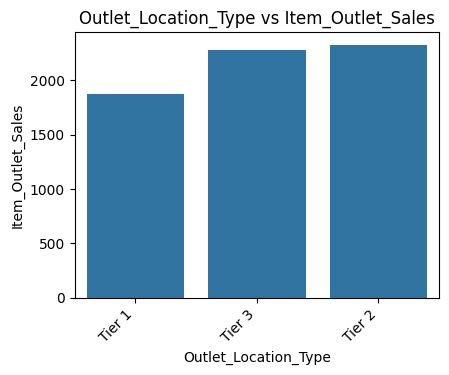

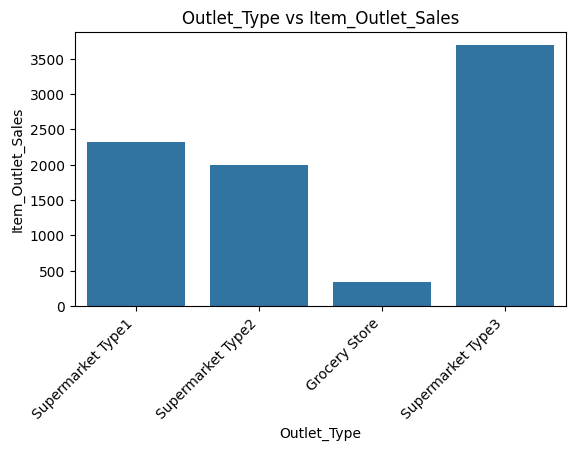

In [65]:

for i, feature in enumerate(categorical_f, start=1):
    plt.figure(figsize=(16, 4 * ((len(train1.columns) - 1) // 3 + 1)))
    plt.subplot((len(train1.columns) - 1) // 3 + 1, 3, i)
    sns.barplot(x=feature, y='Item_Outlet_Sales', data=train1, ci=None)
    plt.title(f'{feature} vs Item_Outlet_Sales')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()

In [66]:
train1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_Bcx,Item_Outlet_Sales_win
0,FDA15,9.300,low fat,0.02,Food,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.018202,3735.1380
1,DRC01,5.920,Regular,0.02,Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.018202,443.4228
2,FDN15,17.500,low fat,0.02,Food,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.018202,2097.2700
3,FDX07,19.200,Regular,0.00,Food,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,0.000000,732.3800
4,NCD19,8.930,low fat,0.00,NonConsumable,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.000000,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,low fat,0.06,Food,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,0.045789,2778.3834
8519,FDS36,8.380,Regular,0.05,NonConsumable,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,0.039817,549.2850
8520,NCJ29,10.600,low fat,0.04,NonConsumable,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,0.033270,1193.1136
8521,FDN46,7.210,Regular,0.15,Food,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,0.081171,1845.5976


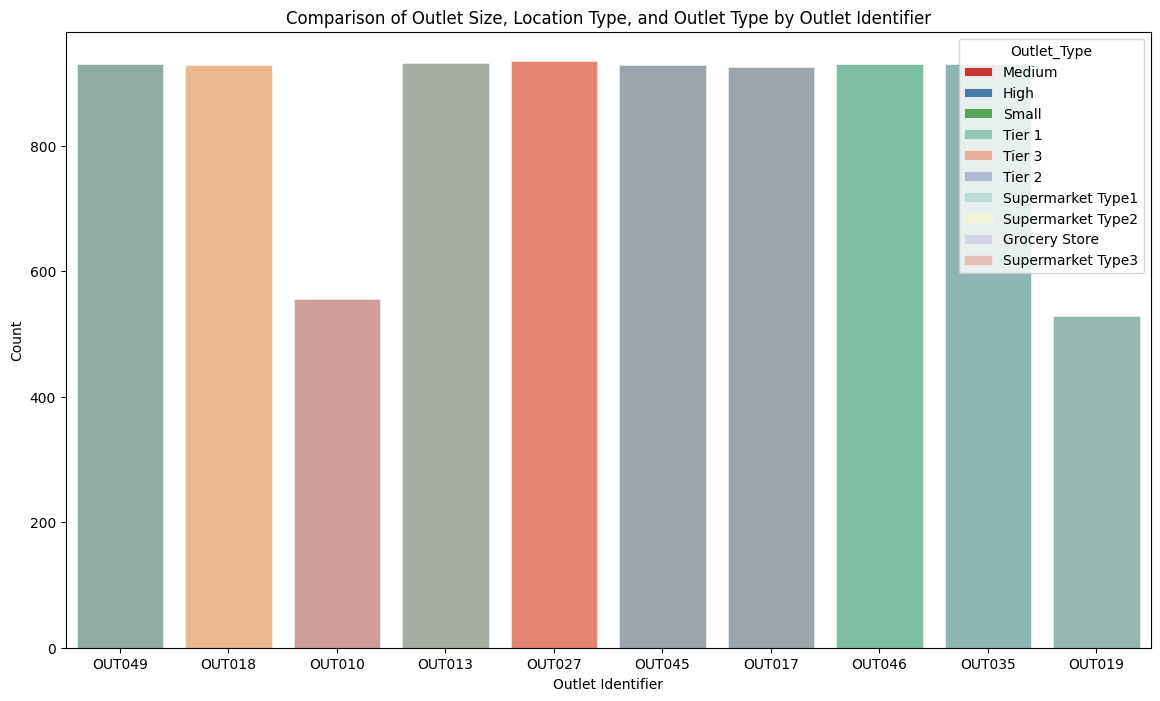

In [67]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Outlet_Identifier', hue='Outlet_Size', data=train1, palette='Set1', edgecolor='w', linewidth=0.5)
sns.countplot(x='Outlet_Identifier', hue='Outlet_Location_Type', data=train1, palette='Set2', edgecolor='w', linewidth=0.5, alpha=0.7)
sns.countplot(x='Outlet_Identifier', hue='Outlet_Type', data=train1, palette='Set3', edgecolor='w', linewidth=0.5, alpha=0.5)
plt.xlabel('Outlet Identifier')
plt.ylabel('Count')
plt.title('Comparison of Outlet Size, Location Type, and Outlet Type by Outlet Identifier')
plt.show()

In [68]:
# Group by Outlet_Identifier, Outlet_Size, Outlet_Type, and Outlet_Location_Type and count occurrences
grouped_counts = train1.groupby(['Outlet_Identifier', 'Outlet_Size', 'Outlet_Type', 'Outlet_Location_Type']).size().reset_index(name='Count')
print(grouped_counts)

  Outlet_Identifier Outlet_Size        Outlet_Type Outlet_Location_Type  Count
0            OUT010      Medium      Grocery Store               Tier 3    555
1            OUT013        High  Supermarket Type1               Tier 3    932
2            OUT017      Medium  Supermarket Type1               Tier 2    926
3            OUT018      Medium  Supermarket Type2               Tier 3    928
4            OUT019       Small      Grocery Store               Tier 1    528
5            OUT027      Medium  Supermarket Type3               Tier 3    935
6            OUT035       Small  Supermarket Type1               Tier 2    930
7            OUT045      Medium  Supermarket Type1               Tier 2    929
8            OUT046       Small  Supermarket Type1               Tier 1    930
9            OUT049      Medium  Supermarket Type1               Tier 1    930


In [69]:
grouped_outlets_count = train1.groupby(['Outlet_Size', 'Outlet_Type', 'Outlet_Location_Type'])['Outlet_Identifier'].nunique().reset_index(name='Outlet_Identifier_Count')
grouped_outlets_count

,Outlet_Size,Outlet_Type,Outlet_Location_Type,Outlet_Identifier_Count
0,High,Supermarket Type1,Tier 3,1
1,Medium,Grocery Store,Tier 3,1
2,Medium,Supermarket Type1,Tier 1,1
3,Medium,Supermarket Type1,Tier 2,2
4,Medium,Supermarket Type2,Tier 3,1
5,Medium,Supermarket Type3,Tier 3,1
6,Small,Grocery Store,Tier 1,1
7,Small,Supermarket Type1,Tier 1,1
8,Small,Supermarket Type1,Tier 2,1


In [70]:
train1.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

([0, 1, 2],
 [Text(0, 0, 'Food'), Text(1, 0, 'NonConsumable'), Text(2, 0, 'Drinks')])

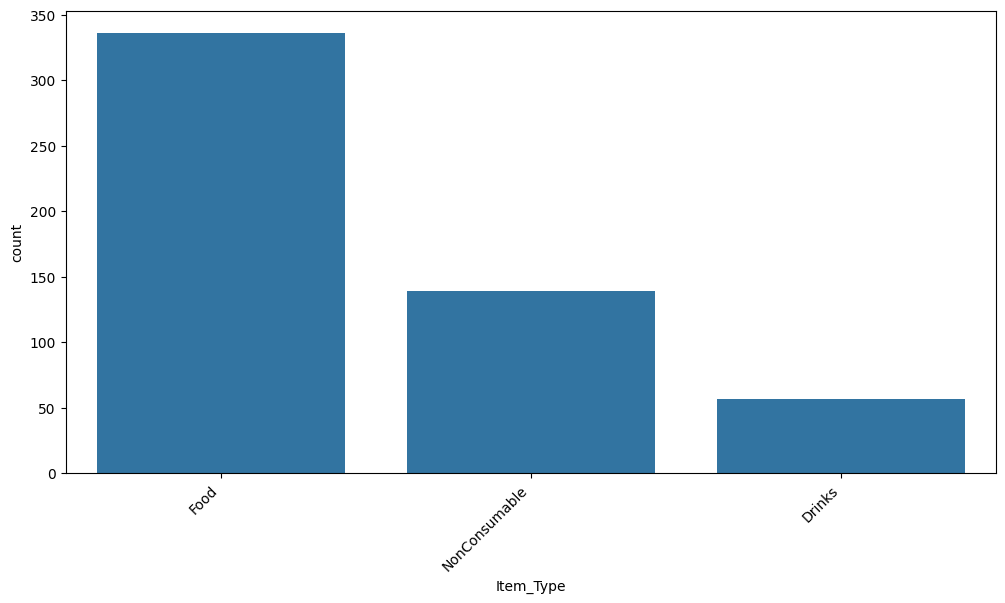

In [71]:
# Creating a count plot for item types with low visibility
items_with_low_visibility = train1[train1['Item_Visibility'] <= 0]
plt.figure(figsize=(12, 6))
sns.countplot(x='Item_Type', data=items_with_low_visibility)
plt.xticks(rotation=45, ha='right')

#Above we have grouped the outlet identifier column using outlet type, outlet size and outlet location type


In [72]:
#performing encoding for required columns

In [73]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [74]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [75]:
train1["Item_Fat_Content"]

0       low fat
1       Regular
2       low fat
3       Regular
4       low fat
         ...   
8518    low fat
8519    Regular
8520    low fat
8521    Regular
8522    low fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [76]:
fat_content_encoded = pd.get_dummies(train1['Item_Fat_Content'], prefix='Fat')
item_type_encoded = pd.get_dummies(train1['Item_Type'], prefix='Type')

In [77]:
train1 = pd.concat([train1, fat_content_encoded, item_type_encoded], axis=1)

# Drop the original 'Item_Fat_Content' and 'Item_Type' columns
train1 = train1.drop(['Item_Fat_Content', 'Item_Type'], axis=1)
train1

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_Bcx,Item_Outlet_Sales_win,Fat_Regular,Fat_low fat,Type_Drinks,Type_Food,Type_NonConsumable
0,FDA15,9.300,0.02,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.018202,3735.1380,0,1,0,1,0
1,DRC01,5.920,0.02,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.018202,443.4228,1,0,1,0,0
2,FDN15,17.500,0.02,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.018202,2097.2700,0,1,0,1,0
3,FDX07,19.200,0.00,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,0.000000,732.3800,1,0,0,1,0
4,NCD19,8.930,0.00,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.000000,994.7052,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.06,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,0.045789,2778.3834,0,1,0,1,0
8519,FDS36,8.380,0.05,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,0.039817,549.2850,1,0,0,0,1
8520,NCJ29,10.600,0.04,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,0.033270,1193.1136,0,1,0,0,1
8521,FDN46,7.210,0.15,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,0.081171,1845.5976,1,0,0,1,0


In [78]:
# i am mapping the other features as they are in hirarical way it will be easy to map them

In [79]:
map={"Small":1,"Medium":2,"High":3}

In [80]:
train1["Outlet_Size"]=train1["Outlet_Size"].map(map)

In [81]:
map1={"Tier 1":1,"Tier 2":2,"Tier 3":3}

In [82]:
train1["Outlet_Location_Type"]=train1["Outlet_Location_Type"].map(map1)

In [83]:
map2={"Supermarket Type1":1,"Supermarket Type2":2,"Supermarket Type3":3,"Grocery Store":4}

In [84]:
train1["Outlet_Type"]=train1["Outlet_Type"].map(map2)

In [85]:
train1["Item_Identifier"]=le.fit_transform(train1["Item_Identifier"])

In [86]:
train1["Outlet_Identifier"]=le.fit_transform(train1["Outlet_Identifier"])

In [87]:
#now lets drop "Item_Visibility" and "Item_Outlet_Sales" as we have the updated columns for them without outliers present

In [88]:
train1.drop(columns=["Item_Visibility","Item_Outlet_Sales"],axis=1,inplace=True)

Scaling the data

In [89]:
train_norm = train1.copy()

In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [91]:
train1[["Item_Weight","Item_MRP","Outlet_Establishment_Year","Item_Visibility_Bcx"]]=sc.fit_transform(train1[["Item_Weight","Item_MRP","Outlet_Establishment_Year","Item_Visibility_Bcx"]])

In [92]:
train1

,Item_Identifier,Item_Weight,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility_Bcx,Item_Outlet_Sales_win,Fat_Regular,Fat_low fat,Type_Drinks,Type_Food,Type_NonConsumable
0,156,-0.841872,1.747454,9,0.139541,2,1,1,-1.011111,3735.1380,0,1,0,1,0
1,8,-1.641706,-1.489023,3,1.334103,2,3,2,-1.011111,443.4228,1,0,1,0,0
2,662,1.098554,0.010040,9,0.139541,2,1,1,-1.011111,2097.2700,0,1,0,1,0
3,1121,1.500838,0.660050,0,0.020085,2,3,4,-1.739687,732.3800,1,0,0,1,0
4,1297,-0.929428,-1.399220,1,-1.293934,3,3,1,-1.739687,994.7052,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,-1.418084,1.180783,1,-1.293934,3,3,1,0.093107,2778.3834,0,1,0,1,0
8519,897,-1.059578,-0.527301,7,0.497909,2,2,1,-0.145953,549.2850,1,0,0,0,1
8520,1357,-0.534243,-0.897208,6,0.736822,1,2,1,-0.407987,1193.1136,0,1,0,0,1
8521,681,-1.336444,-0.607977,3,1.334103,2,3,2,1.509301,1845.5976,1,0,0,1,0


In [93]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [94]:
train_norm

,Item_Identifier,Item_Weight,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility_Bcx,Item_Outlet_Sales_win,Fat_Regular,Fat_low fat,Type_Drinks,Type_Food,Type_NonConsumable
0,156,9.300,249.8092,9,1999,2,1,1,0.018202,3735.1380,0,1,0,1,0
1,8,5.920,48.2692,3,2009,2,3,2,0.018202,443.4228,1,0,1,0,0
2,662,17.500,141.6180,9,1999,2,1,1,0.018202,2097.2700,0,1,0,1,0
3,1121,19.200,182.0950,0,1998,2,3,4,0.000000,732.3800,1,0,0,1,0
4,1297,8.930,53.8614,1,1987,3,3,1,0.000000,994.7052,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,214.5218,1,1987,3,3,1,0.045789,2778.3834,0,1,0,1,0
8519,897,8.380,108.1570,7,2002,2,2,1,0.039817,549.2850,1,0,0,0,1
8520,1357,10.600,85.1224,6,2004,1,2,1,0.033270,1193.1136,0,1,0,0,1
8521,681,7.210,103.1332,3,2009,2,3,2,0.081171,1845.5976,1,0,0,1,0


In [95]:
train_norm[["Item_Weight","Item_MRP","Outlet_Establishment_Year","Item_Visibility_Bcx"]] = mms.fit_transform(train_norm[["Item_Weight","Item_MRP","Outlet_Establishment_Year","Item_Visibility_Bcx"]])

In [96]:
train1[["Item_Identifier","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"]]= sc.fit_transform(train1[["Item_Identifier","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"]])

#EDA FOR TEST DATASET

In [97]:
test1=test.copy()

In [98]:
test1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [99]:
test1.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [100]:
test1["Item_Weight"].fillna(test1["Item_Weight"].mean(),inplace=True)

In [101]:
test1["Outlet_Size"].fillna(test1["Outlet_Size"].mode()[0],inplace=True)

In [102]:
test1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [103]:
test1["Item_Fat_Content"]=test1["Item_Fat_Content"].replace(["Low Fat","LF"],"low fat")
test1["Item_Fat_Content"]=test1["Item_Fat_Content"].replace("reg","Regular")

In [104]:
mapping = {
    "Dairy": "Food","Soft Drinks": "Drinks","Meat": "Food","Fruits and Vegetables": "Food","Household": "NonConsumable","Baking Goods": "NonConsumable","Snack Foods": "Food","Frozen Foods": "Food","Breakfast": "Food",  "Health and Hygiene": "NonConsumable", "Hard Drinks": "Drinks","Canned": "Food","Breads": "Food", "Starchy Foods": "Food","Others": "NonConsumable","Seafood": "Food"
      }

In [105]:
test1["Item_Type"]=test1["Item_Type"].str.strip().map(mapping)

In [106]:
test1["Item_Fat_Content"]=le.fit_transform(test1["Item_Fat_Content"])

In [107]:
map={"Small":1,"Medium":2,"High":3}

In [108]:
test1["Outlet_Size"]=test1["Outlet_Size"].map(map)

In [109]:
map1={"Tier 1":1,"Tier 2":2,"Tier 3":3}

In [110]:
test1["Outlet_Location_Type"]=test1["Outlet_Location_Type"].map(map1)

In [111]:
map2={"Supermarket Type1":1,"Supermarket Type2":2,"Supermarket Type3":3,"Grocery Store":4}

In [112]:
test1["Outlet_Type"]=test1["Outlet_Type"].map(map2)

In [113]:
test1["Item_Identifier"]=le.fit_transform(test1["Item_Identifier"])

In [114]:
test1["Outlet_Identifier"]=le.fit_transform(test1["Outlet_Identifier"])

In [115]:
map3={"Food":1,"Drinks":2,"NonConsumable":3}

In [116]:
test1["Item_Type"]=test1["Item_Type"].map(map3)

In [117]:
test1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,1,107.8622,9,1999,2,1,1
1,1067,8.300000,0,0.038428,1,87.3198,2,2007,2,2,1
2,1406,14.600000,1,0.099575,3,241.7538,0,1998,2,3,4
3,809,7.315000,1,0.015388,1,155.0340,2,2007,2,2,1
4,1184,12.695633,0,0.118599,1,234.2300,5,1985,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,0,0.013496,1,141.3154,8,1997,1,1,1
5677,306,7.600000,0,0.142991,1,169.1448,3,2009,2,3,2
5678,1412,10.000000,1,0.073529,3,118.7440,7,2002,2,2,1
5679,517,15.300000,0,0.000000,1,214.6218,2,2007,2,2,1


#Model Building

In [118]:
train1

,Item_Identifier,Item_Weight,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility_Bcx,Item_Outlet_Sales_win,Fat_Regular,Fat_low fat,Type_Drinks,Type_Food,Type_NonConsumable
0,-1.388514,-0.841872,1.747454,1.507813,0.139541,0.284581,-1.369334,-0.650957,-1.011111,3735.1380,0,1,0,1,0
1,-1.717991,-1.641706,-1.489023,-0.607071,1.334103,0.284581,1.091569,0.266541,-1.011111,443.4228,1,0,1,0,0
2,-0.262057,1.098554,0.010040,1.507813,0.139541,0.284581,-1.369334,-0.650957,-1.011111,2097.2700,0,1,0,1,0
3,0.759769,1.500838,0.660050,-1.664513,0.020085,0.284581,1.091569,2.101536,-1.739687,732.3800,1,0,0,1,0
4,1.151580,-0.929428,-1.399220,-1.312032,-1.293934,1.950437,1.091569,-0.650957,-1.739687,994.7052,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-0.912107,-1.418084,1.180783,-1.312032,-1.293934,1.950437,1.091569,-0.650957,0.093107,2778.3834,0,1,0,1,0
8519,0.261100,-1.059578,-0.527301,0.802852,0.497909,0.284581,-0.138882,-0.650957,-0.145953,549.2850,1,0,0,0,1
8520,1.285152,-0.534243,-0.897208,0.450371,0.736822,-1.381274,-0.138882,-0.650957,-0.407987,1193.1136,0,1,0,0,1
8521,-0.219759,-1.336444,-0.607977,-0.607071,1.334103,0.284581,1.091569,0.266541,1.509301,1845.5976,1,0,0,1,0


In [119]:
#now lets split the data into independent and dependent features

In [120]:
x = train1.drop(columns=["Item_Outlet_Sales_win"])
y = train1["Item_Outlet_Sales_win"]

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
from sklearn.metrics import mean_squared_error, r2_score

In [123]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

#Random Forest

In [124]:
# now lets import random forest model

In [125]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()

In [126]:
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

In [127]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [128]:
random_search = RandomizedSearchCV(estimator=RF, param_distributions=param_grid, n_iter=10, cv=5, scoring='r2', n_jobs=-1, random_state=42)
random_search.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='r2')

In [129]:
random_params = random_search.best_params_

In [130]:
RF_random = RandomForestRegressor(**random_params)
RF_random.fit(xtrain, ytrain)

RandomForestRegressor(max_depth=10, min_samples_leaf=4)

In [131]:
ypred_random=RF_random.predict(xtest)

In [132]:
RF_train_score= RF_random.score(xtrain,ytrain)
RF_train_score

0.7004325768182098

In [133]:
mse = mean_squared_error(ytest,ypred_random)
rmse = np.sqrt(mse)
r2_ = r2_score(ytest,ypred_random)
print(f"mean_squared_error : {mse}")
print(f"root_mean_square_error : {rmse}")
print(f"r_square : {r2_}")

mean_squared_error : 852004.4331257608
root_mean_square_error : 923.0408621105356
r_square : 0.6234643724070098


In [134]:
#Calculating the adjusted R-squared value
n = len(y)
k = x.shape[1] - 1
adjusted_rsquared = 1 - (1 - r2_) * (n - 1) / (n - k - 1)
print(f"R-squared: {r2_}")
print(f"Adjusted R-squared: {adjusted_rsquared}")

R-squared: 0.6234643724070098
Adjusted R-squared: 0.6228891034965962


In [135]:
#cross val score
from sklearn.model_selection import cross_val_score, KFold

In [136]:
kf1 = KFold(n_splits=5, shuffle=True, random_state=42)

In [137]:
cv_score_ = cross_val_score(RF_random, x, y, cv=kf1, scoring='r2')
print(f"Cross Val Score:{cv_score_}")
print(f'Mean R-squared: {np.mean(cv_score_)}')

Cross Val Score:[0.6245564  0.60465041 0.60985192 0.60057433 0.59279216]
Mean R-squared: 0.6064850458219481


In [138]:
#data scaled using normalization
x1 = train_norm.drop(columns=["Item_Outlet_Sales_win"])
y1 = train_norm["Item_Outlet_Sales_win"]

In [139]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [140]:
random_search_ = RandomizedSearchCV(estimator=RF, param_distributions=param_grid, n_iter=10, cv=5, scoring='r2', n_jobs=-1, random_state=42)
random_search_.fit(xtrain1, ytrain1)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='r2')

In [141]:
random_params_ = random_search_.best_params_

In [142]:
RF_random_ = RandomForestRegressor(**random_params_)
RF_random_.fit(xtrain1, ytrain1)

RandomForestRegressor(max_depth=10, min_samples_leaf=4)

In [143]:
ypred_random_=RF_random_.predict(xtest1)

In [144]:
ypred_random_

array([1081.39703438,  718.44892574,  716.754729  , ...,  708.29731837,
        609.81318447, 1625.19043195])

In [145]:
mse = mean_squared_error(ytest1,ypred_random_)
rmse = np.sqrt(mse)
_r2_ = r2_score(ytest1,ypred_random_)
print(f"mean_squared_error : {mse}")
print(f"root_mean_square_error : {rmse}")
print(f"r_square : {_r2_}")

mean_squared_error : 857898.7161971307
root_mean_square_error : 926.2282203631731
r_square : 0.6208594474920693


In [146]:
#Calculating the adjusted R-squared value
n = len(y)
k = x.shape[1] - 1
adjusted_rsquared = 1 - (1 - _r2_) * (n - 1) / (n - k - 1)
print(f"R-squared: {_r2_}")
print(f"Adjusted R-squared: {adjusted_rsquared}")

R-squared: 0.6208594474920693
Adjusted R-squared: 0.6202801987927389


In [147]:
#cross val score

In [148]:
kf2 = KFold(n_splits=5, shuffle=True, random_state=42)

In [149]:
cv_score_1 = cross_val_score(RF_random, x, y, cv=kf2, scoring='r2')
print(f"Cross Val Score:{cv_score_1}")
print(f'Mean R-squared: {np.mean(cv_score_1)}')

Cross Val Score:[0.62164285 0.6095168  0.60468394 0.60072872 0.59075876]
Mean R-squared: 0.6054662151060363


In [150]:
#Calculating MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - ypred_random_) / y_true)) * 100
mape = calculate_mape(ytest1, ypred_random_)
print(f"MAPE: {mape}")

MAPE: 51.156406198088845


#SVR

In [151]:
#we will try to use SVM model for model building

In [152]:
from sklearn.svm import SVR

In [153]:
svm_model= SVR(kernel="linear")

In [154]:
svm_model.fit(xtrain,ytrain)

SVR(kernel='linear')

In [155]:
ypred_svm = svm_model.predict(xtest)

In [156]:
train_score= svm_model.score(xtrain,ytrain)
train_score

0.45050409402315805

In [157]:
mse = mean_squared_error(ytest,ypred_svm)
rmse = np.sqrt(mse)
r2 = r2_score(ytest,ypred_svm)

In [158]:
print(f"mean_squared_error : {mse}")
print(f"root_mean_square_error : {rmse}")
print(f"r_square : {r2}")

mean_squared_error : 1223022.7757543311
root_mean_square_error : 1105.9036014745277
r_square : 0.45949618273734516


In [159]:
#Calculating the adjusted R-squared value
n = len(y1)
k = x1.shape[1] - 1
adjusted_rsquared = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adjusted_rsquared}")

R-squared: 0.45949618273734516
Adjusted R-squared: 0.4586704041941069


In [160]:
#normalized data
x2 = train_norm.drop(columns=["Item_Outlet_Sales_win"])
y2 = train_norm["Item_Outlet_Sales_win"]

In [161]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [162]:
svm_model.fit(xtrain2,ytrain2)

SVR(kernel='linear')

In [163]:
ypred2 = svm_model.predict(xtest2)

In [164]:
mse2 = mean_squared_error(ytest2,ypred2)
rmse2 = np.sqrt(mse)
r22 = r2_score(ytest2,ypred2)

In [165]:
print(f"mean_squared_error : {mse2}")
print(f"root_mean_square_error : {rmse2}")
print(f"r_square : {r22}")

mean_squared_error : 1717185.9375054184
root_mean_square_error : 1105.9036014745277
r_square : 0.24110525775043623


In [166]:
#Calculating the adjusted R-squared value
n = len(y2)
k = x2.shape[1] - 1
adjusted_rsquared = 1 - (1 - r22) * (n - 1) / (n - k - 1)
print(f"R-squared: {r22}")
print(f"Adjusted R-squared: {adjusted_rsquared}")

R-squared: 0.24110525775043623
Adjusted R-squared: 0.23994582284042987


In [167]:
#performing cross val score

In [168]:
from sklearn.model_selection import cross_val_score, KFold

In [169]:
# Creating KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [170]:
cv_score = cross_val_score(svm_model, x, y, cv=kf, scoring='r2')

In [171]:
print(f"Cross Val Score:{cv_score}")
print(f'Mean R-squared: {np.mean(cv_score)}')

Cross Val Score:[0.45949617 0.44679734 0.45601144 0.44841978 0.44119684]
Mean R-squared: 0.4503843138278266


In [172]:
#calculating the mape
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - ypred_svm) / y_true)) * 100
mape = calculate_mape(ytest, ypred_svm)
print(f"MAPE: {mape}")

MAPE: 79.43368851691842


#XGBoost

In [173]:
#lets use XGboost model
!pip install xgboost

In [174]:
from xgboost import XGBRegressor
from scipy.stats import uniform, randint

In [175]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [176]:
XGB = XGBRegressor()

In [177]:
params_ = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 6),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)}

In [178]:
# Performing RandomizedSearchCV
random_xgb = RandomizedSearchCV(estimator=XGB, param_distributions=params_,
                                   n_iter=10, scoring="r2", cv=5, random_state=42)
random_xgb.fit(x_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce4ab161f30>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce4ab161330>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce4ab162e30>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ce4ab161a20>},
                   random_state=42, scoring='r2')

In [179]:
params= random_xgb.best_params_
model_xgb=random_xgb.best_estimator_

In [180]:
ypred_XGB=model_xgb.predict(x_test)

In [181]:
mse3 = mean_squared_error(y_test,ypred_XGB)
r2_= r2_score(y_test,ypred_XGB)
rmse = np.sqrt(mse3)

In [182]:
train_score_ = random_xgb.score(x_train,y_train)
train_score_

0.6299745847387956

In [183]:
print(f"mean_squared_error : {mse3}")
print(f"r2_score : {r2_}")
print(f"RMSE : {rmse}")
print(f"Best Hyperparamters:{params}")

mean_squared_error : 837063.2298580437
r2_score : 0.6300675016052517
RMSE : 914.9115967447585
Best Hyperparamters:{'colsample_bytree': 0.836965827544817, 'learning_rate': 0.02393512381599932, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 122, 'subsample': 0.6260206371941118}


In [184]:
# Calculating MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - ypred_XGB) / y_true)) * 100
mape = calculate_mape(y_test, ypred_XGB)
print(f"MAPE: {mape}")

MAPE: 57.104339911849436


In [185]:
#Calculating the adjusted R-squared value
n = len(y)
k = x.shape[1] - 1
adjusted_rsquared = 1 - (1 - r2_) * (n - 1) / (n - k - 1)
print(f"R-squared: {r2_}")
print(f"Adjusted R-squared: {adjusted_rsquared}")

R-squared: 0.6300675016052517
Adjusted R-squared: 0.6295023209166712


In [186]:
from sklearn.model_selection import cross_val_score, KFold

In [187]:
# Creating KFold object
KF = KFold(n_splits=5, shuffle=True, random_state=42)

In [188]:
cv_scores = cross_val_score(XGB, x, y, cv=KF, scoring='neg_mean_squared_error')

In [189]:
# Converting negative MSE to positive RMSE
cv_rmse_scores = np.sqrt(-cv_scores)

In [190]:
print(f"CV RMSE Scores: {cv_rmse_scores}")
print(f"Mean RMSE: {np.mean(cv_rmse_scores)}")

CV RMSE Scores: [1014.41806621 1018.16901478 1052.89013792 1035.30444178 1104.89166722]
Mean RMSE: 1045.134665579868


In [191]:
#now lets use the normalized x and y variables for cross val score

In [192]:
KF1 = KFold(n_splits=6, shuffle=True, random_state=42)

In [193]:
cv_scores_r2 = cross_val_score(XGB, x, y, cv=KF1, scoring='r2')

In [194]:
print(f'Cross-Validation R-squared Scores: {cv_scores_r2}')
print(f'Mean R-squared: {np.mean(cv_scores_r2)}')

Cross-Validation R-squared Scores: [0.5652413  0.54305081 0.54897256 0.55047668 0.5369215  0.52015901]
Mean R-squared: 0.5441369762868671


In [195]:
# model evaluation for normalized data

In [196]:
random_xgb1 = RandomizedSearchCV(estimator=XGB, param_distributions=params_,
                                   n_iter=10, scoring="r2", cv=5, random_state=42)
random_xgb1.fit(xtrain2, ytrain2)


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce4ab161f30>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce4ab161330>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce4ab162e30>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ce4ab161a20>},
                   random_state=42, scoring='r2')

In [197]:
params1= random_xgb.best_params_
model_xgb1=random_xgb.best_estimator_

In [198]:
ypred_XGB1=model_xgb1.predict(xtest2)

In [199]:
mse4 = mean_squared_error(ytest2,ypred_XGB1)
r2_1= r2_score(ytest2,ypred_XGB1)

In [200]:
train_score_1 = random_xgb.score(xtrain2,ytrain2)
train_score_1

-0.0359830306307507

In [201]:
print(f"mean_squared_error : {mse4}")
print(f"r2_score : {r2_1}")
print(f"Best Hyperparamters:{params1}")

mean_squared_error : 2438674.073866684
r2_score : -0.07774987687488655
Best Hyperparamters:{'colsample_bytree': 0.836965827544817, 'learning_rate': 0.02393512381599932, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 122, 'subsample': 0.6260206371941118}


#Ridge Regressor

In [202]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm

In [203]:
x = train1.drop(columns=["Item_Outlet_Sales_win"])
y = train1["Item_Outlet_Sales_win"]

In [204]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [205]:
ridge_model = Ridge()

In [206]:
#hyperparameter tuning
param_grid = {'alpha': [0.1, 1.0, 10.0]}
grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1.0, 10.0]})

In [207]:
best_alpha = grid_search.best_params_['alpha']

In [208]:
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(xtrain, ytrain)

Ridge(alpha=10.0)

In [209]:
ypred= ridge_model.predict(xtest)

In [210]:
ridge_train= ridge_model.score(xtrain,ytrain)
ridge_train

0.5033767571012246

In [211]:
r2 = r2_score(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)

In [212]:
#adjusted rsquare
n = len(y_test)
p = xtest.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

In [213]:
mape = np.mean(np.abs((ytest - ypred) / ytest)) * 100

In [214]:
cv_score = cross_val_score(ridge_model, x, y, cv=5).mean()

In [215]:
print(f"r_square :{r2}")
print(f"MSE :{mse}")
print(f"RMSE :{rmse}")
print(f"adj_r2 :{adj_r2}")
print(f"MAPE :{mape}")
print(f"CV_score :{cv_score}")

r_square :0.5061996610968822
MSE :1117344.6733684114
RMSE :1057.0452560644749
adj_r2 :0.5021090074018268
MAPE :86.65779229617874
CV_score :0.5021246825168193


In [216]:
#normalized data
#hyperparameter tuning

param_grid_ = {'alpha': [0.1, 1.0, 10.0]}
grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
grid_search.fit(xtrain2, ytrain2)

GridSearchCV(cv=5, estimator=Ridge(alpha=10.0),
             param_grid={'alpha': [0.1, 1.0, 10.0]})

In [217]:
best_alpha_ = grid_search.best_params_['alpha']

In [218]:
ridge_model_ = Ridge(alpha=best_alpha_)
ridge_model_.fit(xtrain2, ytrain2)

Ridge()

In [219]:
ypred_= ridge_model_.predict(xtest2)

In [220]:
r2_ = r2_score(ytest2, ypred_)
mse_ = mean_squared_error(ytest2, ypred_)
rmse_ = np.sqrt(mse)

In [221]:
#adjusted rsquare
n = len(ytest2)
p = xtest2.shape[1]
adj_r2_ = 1 - ((1 - r2_) * (n - 1) / (n - p - 1))

In [222]:
cv_score_ = cross_val_score(ridge_model, x, y, cv=5).mean()

In [223]:
print(f"r2_score: {r2_}")
print(f"adj_r2 : {adj_r2_}")
print(f"CV score: {cv_score_}")

r2_score: 0.5062097538400154
adj_r2 : 0.5021191837534831
CV score: 0.5021246825168193


#Lasso Regressor

In [224]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [225]:
from sklearn.linear_model import LassoCV, Lasso

In [226]:
lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5)
lasso_cv.fit(x_train, y_train)

LassoCV(alphas=array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.84803587e-03, 3.43046929e-03,
       4.13201240e-03, 4.97702356e-0...
       1.38488637e+02, 1.66810054e+02, 2.00923300e+02, 2.42012826e+02,
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
        cv=5)

In [227]:
alpha = lasso_cv.alpha_

In [228]:
lasso_model = Lasso(alpha=alpha)

In [229]:
lasso_model.fit(x_train, y_train)

Lasso(alpha=2.310129700083163)

In [230]:
y_pred = lasso_model.predict(x_test)

In [231]:
lasso_train= lasso_model.score(x_train,y_train)
lasso_train

0.5033088239050499

In [232]:
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)
mse = mean_squared_error(y_test, y_pred)
rmse1 = np.sqrt(mse)

In [233]:
cross_val_r2_scores = cross_val_score(lasso_model, x_train, y_train, cv=5, scoring='r2')
lasso_cv= cross_val_r2_scores.mean()

In [234]:
print(f"R2 Score: {r2}")
print(f"Adjusted R2 Score: {adj_r2}")
print(f"MSE: {mse}")
print(f"Cross-Validation R2 Scores: {cross_val_r2_scores}")
print(f"CV : {lasso_cv}")
print(f"RMSE: {rmse1}")

R2 Score: 0.5063624714085178
Adjusted R2 Score: 0.5022731664379374
MSE: 1116976.275009513
Cross-Validation R2 Scores: [0.50248169 0.49459702 0.50375245 0.50815643 0.49789956]
CV : 0.5013774312640283
RMSE: 1056.8709831429344


In [235]:
#normalized data

In [236]:
lasso_cv_ = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5)
lasso_cv_.fit(xtrain2, ytrain2)

LassoCV(alphas=array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.84803587e-03, 3.43046929e-03,
       4.13201240e-03, 4.97702356e-0...
       1.38488637e+02, 1.66810054e+02, 2.00923300e+02, 2.42012826e+02,
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
        cv=5)

In [237]:
#selected parameters
alpha_ = lasso_cv_.alpha_

In [238]:
#lasso model creation
lasso_model_ = Lasso(alpha=alpha_)


In [239]:
lasso_model_.fit(xtrain2, ytrain2)

Lasso(alpha=1.0974987654930568)

In [240]:
y_pred_ = lasso_model_.predict(xtest2)

In [241]:
r2_1 = r2_score(ytest2, y_pred_)
adj_r2_1 = 1 - (1 - r2_1) * (len(ytest2) - 1) / (len(ytest2) - xtest2.shape[1] - 1)
mse_1 = mean_squared_error(ytest2, y_pred_)

In [242]:
_cross_val_r2_scores = cross_val_score(lasso_model_, xtrain2, ytrain2, cv=5, scoring='r2')

In [243]:
print(f"r2_score: {r2_1}")
print(f"adjusted r2 score: {adj_r2_1}")
print(f"mse: {mse_1}")
print(f"cross_val_score: {_cross_val_r2_scores}")

r2_score: 0.5065185953078671
adjusted r2 score: 0.5024305836713643
mse: 1116623.0063023446
cross_val_score: [0.5026752  0.4948576  0.50353327 0.50778282 0.49786372]


In [244]:
#mape
#show 3 best models in excel
#cv score for all 3 models
#all models with rmse, cv, r2, adjusted r2

In [245]:
#hyperparameter tuning

#5 MODELS

In [246]:
RandomForest_data = {
    'Model': ['Random Forest'],
    'Train Score': [71],
    'MSE': [868865],
    'RMSE': [932],
    'R2 Score': [61.60],
    'Adjusted R2 Score': [61.54],
    'Cross-Validation Score': [60.32],
    'Normalized MSE': [849344.72],
    'Normalized RMSE': [921.59],
    'Normalized R2 Score': [62.46],
    'Normalized Adjusted R2 Score': [62.40],
    'Normalized Cross-Validation Score': [60.44],
    'MAPE': [51.12]
}
# Data for SVM
SVM_data = {
    'Model': ['SVM'],
    'Train Score': [45.34],
    'MSE': [1215757.74],
    'RMSE': [1102.61],
    'R2 Score': [46.27],
    'Adjusted R2 Score': [46.18],
    'Cross-Validation Score': [45.21],
    'MAPE': [79.29],
    'Normalized MSE': [1717185.93],
    'Normalized RMSE': [1102.61],
    'Normalized R2 Score': [24.11],
    'Normalized Adjusted R2 Score': [23.99]
}
# Data for XGBoost
XGBOOST_data = {
    'Model': ['XGBoost'],
    'Train Score': [62.99],
    'MSE': [837063.22],
    'R2 Score': [63.00],
    'MAPE': [57.10],
    'Adjusted R2 Score': [62.95],
    'CV RMSE': [1045.13],
    'Cross-Validation Score': [54.41],
    'RMSE': [914.911]
}
RIDGE_data = {
    "Model": ["Ridge"],
    "Train Score": [50.33],
    "MSE": [1117344.67],
    "R2 Score": [50.61],
    "MAPE": [86.65],
    "Adjusted R2 Score": [50.21],
    "Cross-Validation Score":[50.21],
    "Normalized R2 Score": [50.62],
    "Normalized Adjusted R2 Score": [50.21],
    "Normalized Cross-Validation Score": [50.21],
    "RMSE":[1057.04]


}
LASSO_data = {
    "Model": ["Lasso"],
    "MSE": [1116976],
    "R2 Score": [50.62],
    "Adjusted R2 Score": [50.22],
    "Cross-Validation Score":[50],
    "Normalized R2 Score": [50.65],
    "Normalized Adjusted R2 Score":[50.24],
    "Normalized MSE": [1116623.00],
    "Train Score": [50.33],
    "RMSE": [1056.87]
}

In [247]:
RANDOMFOREST_df = pd.DataFrame(RandomForest_data)
SVM_df = pd.DataFrame(SVM_data)
XGBOOST_df = pd.DataFrame(XGBOOST_data)
LASSO_df = pd.DataFrame(LASSO_data)
RIDGE_df = pd.DataFrame(RIDGE_data)
# Concatenate DataFrames
summary_table = pd.concat([RANDOMFOREST_df, SVM_df, XGBOOST_df, LASSO_df, RIDGE_df], ignore_index=True)

In [248]:
summary_table

,Model,Train Score,MSE,RMSE,R2 Score,Adjusted R2 Score,Cross-Validation Score,Normalized MSE,Normalized RMSE,Normalized R2 Score,Normalized Adjusted R2 Score,Normalized Cross-Validation Score,MAPE,CV RMSE
0,Random Forest,71.00,868865.00,932.000,61.60,61.54,60.32,849344.72,921.59,62.46,62.40,60.44,51.12,NaN
1,SVM,45.34,1215757.74,1102.610,46.27,46.18,45.21,1717185.93,1102.61,24.11,23.99,NaN,79.29,NaN
2,XGBoost,62.99,837063.22,914.911,63.00,62.95,54.41,NaN,NaN,NaN,NaN,NaN,57.10,1045.13
3,Lasso,50.33,1116976.00,1056.870,50.62,50.22,50.00,1116623.00,NaN,50.65,50.24,NaN,NaN,NaN
4,Ridge,50.33,1117344.67,1057.040,50.61,50.21,50.21,NaN,NaN,50.62,50.21,50.21,86.65,NaN


In [249]:
import joblib
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()

In [250]:
joblib.dump(RF,'RF.sav')

['RF.sav']

In [251]:
loaded_model = joblib.load('RF.sav')

In [252]:
from sklearn.preprocessing import StandardScaler

In [253]:
sc = StandardScaler()

In [254]:
joblib.dump(sc,"sc.sav")

['sc.sav']